# Increase Number Images Training

 ## Import Libraries

In [3]:
import pickle
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
import glob
import os
import pandas as pd

 ## Directories

In [4]:
PATH="C:/Users/Usuario/Desktop/Pruebas/kerasDirec/fotosPi/"
PATH1="C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/"

 ## Auxiliary functions (Load-Conversion)

In [5]:
### Mostrar Imagen
def mostrarImg(img):
    plt.imshow(img)
    plt.show()
    
### Cargar imagenes desde directorio  
def img_direct():
    Imagenes = os.listdir(PATH)
    imgs = []
    labels = []
    for image in Imagenes:
            l = [0,0,0] # [l,w,r]
            if image.find('l') != -1:
                path = os.path.join(PATH, image)
                img1 = cv2.imread(path)
                imgs.append(img1)
                l = [1,0,0] 
                labels.append(l)
            if image.find('w') != -1:
                path = os.path.join(PATH, image)
                img1 = cv2.imread(path)
                imgs.append(img1)
                l = [0,1,0] 
                labels.append(l)
            if image.find('r') != -1:
                path = os.path.join(PATH, image)
                img1 = cv2.imread(path)
                imgs.append(img1)
                l = [0,0,1] 
                labels.append(l)
    return np.array(imgs), np.array(labels)
        
### Separar datos
def split(data, labels, fr):
    i = int(len(data)*fr)
    return data[:i], labels[:i], data[i:], labels[i:]

### Mostrar Varias imagenes
def mostrarImagenes(imagenes, cls_true, cls_pred=None):
    fig, axes = plt.subplots(6, 9)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(imagenes[i], cmap='binary')
        if cls_pred is None:
            xlabel = cls_true[i]
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

### Abrir pickle
def abrir(f):
    with open(f,'rb') as fi:  
        data, label = pickle.load(fi, encoding='latin1')
    return data, label

### Guardar pickle
def guardar(f,data,label,_as_nparray=False):
    if(_as_nparray):
        simg = np.asarray(data)
        slabel = np.asarray(label)
        np.savez(f,train=data,label=label)
    else:
        with open(f,'wb') as fi:
            pickle.dump([data, label], fi, protocol=2)
        print(f + ' saved!')

 ## Upload images

Numero Imagenes Entrenamiento:  358
Dimensiones Imagenes:  (358, 240, 320, 3)


D:\Anaconda\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


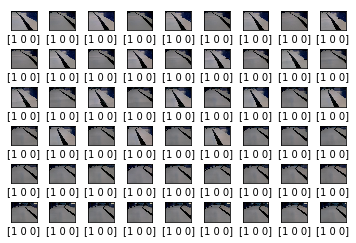

In [9]:
t_data, t_labels = img_direct()
print ("Numero Imagenes Entrenamiento: ", len(t_data))
print("Dimensiones Imagenes: ",t_data.shape)
mostrarImagenes(imagenes=t_data[0:54],cls_true=t_labels[0:54])

 ## Save Pickle

In [11]:
guardar(PATH1+'FIN_Original'+'.pkl',t_data, t_labels)

C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Original.pkl saved!


 ## Flip Functions

In [12]:
### Flip Labels e imagen
def flipImg(img,label):
    n_labels = np.zeros_like(label)
    if(label[0] == 1):
        n_labels[2] = 1
    elif(label[2] == 1):
        n_labels[0] = 1
    else:
        n_labels[1] = 1
    return cv2.flip(img,1), n_labels

### Flip todas imagenes
def flipData(f,data,label):
    f_data = []
    f_label = []
    for i in range(len(data)):
        t, l = flipImg(data[i],label[i])
        f_data.append(t)
        f_label.append(l)

    f_file = PATH1+f+'.pkl'
    guardar(f_file,f_data,f_label)

In [13]:
flipData('FIN_Giro',t_data,t_labels)

C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Giro.pkl saved!


 ## Show Flip Images

Numero Imagenes:  358


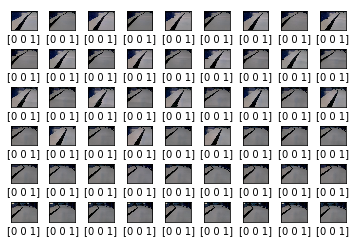

In [14]:
f_data, f_labels = abrir(PATH1+'FIN_Giro.pkl')
print("Numero Imagenes: ",len(f_data))
mostrarImagenes(imagenes=f_data[0:54],cls_true=f_labels[0:54])

 ## Brightness Functions

In [15]:
### Genera brillo aleatorio
def brilloImg(img,random=False):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    if(random):
        ratio = 1.0 + 0.6 * (np.random.rand() - 0.5)
    else:
        ratio = 1.5 
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

### Genera brillo aleatorio a todas las imagenes
def brilloData(f,data,label):
    br_data = []
    for i in range(len(data)):
        t = brilloImg(data[i],True)
        br_data.append(t)
    b_file = PATH1+f+'.pkl'
    guardar(b_file,br_data,label)

In [16]:
brilloData('FIN_Brillo_Original',t_data,t_labels)
brilloData('FIN_Brillo_Giro',f_data,f_labels)

C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Brillo_Original.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Brillo_Giro.pkl saved!


 ## Show Images Brightness

Numero Imagenes:  358


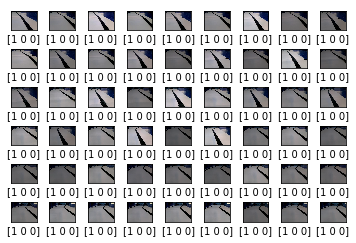

Numero Imagenes:  358


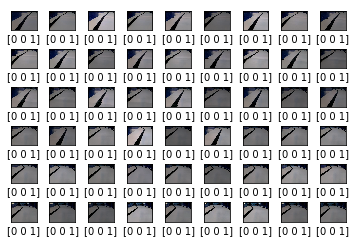

In [17]:
p_data, p_labels = abrir(PATH1+'FIN_Brillo_Original.pkl')
bf_data, bf_labels = abrir(PATH1+'FIN_Brillo_Giro.pkl')
print("Numero Imagenes: ",len(p_data))
mostrarImagenes(imagenes=p_data[0:54],cls_true=p_labels[0:54])
print("Numero Imagenes: ",len(bf_data))
mostrarImagenes(imagenes=bf_data[0:54],cls_true=bf_labels[0:54])

 ## Color Functions

In [18]:
### Cambia Color segun ratio
def colorData(f,data,label,r):
    co_data = []
    for i in range(len(data)):
        t = colorRatio(data[i],'b',r)
        co_data.append(t)
    c_file = PATH1+f+'.pkl'
    guardar(c_file,co_data,label)
    
### Ratio
def colorRatio(imagen, rgb = 'b', r = 1):
    n = np.zeros_like(imagen)
    n[:] = imagen[:]
    if(rgb=='r'):
        n[:,:,0] = n[:,:,0] * r
    elif(rgb=='g'):
        n[:,:,1] = n[:,:,1] * r
    elif(rgb=='b'):
        n[:,:,2] = n[:,:,2] * r
    else:
        print('Error')
    return n

In [19]:
colorData('FIN_Original_Color_1.8',t_data,t_labels,1.8)
colorData('FIN_Giro_Color_1.8',f_data, f_labels,1.8)

C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Original_Color_1.8.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Giro_Color_1.8.pkl saved!


 ## Show Images Color

Numero Imagenes:  358


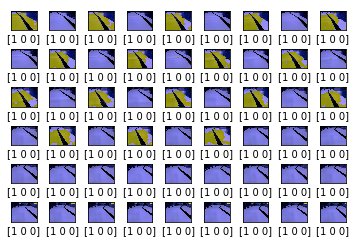

Numero Imagenes:  358


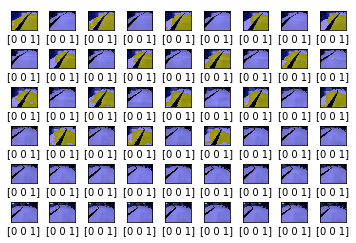

In [20]:
c_data, c_labels = abrir(PATH1+'FIN_Original_Color_1.8.pkl')
cf_data, cf_labels = abrir(PATH1+'FIN_Giro_Color_1.8.pkl')
print("Numero Imagenes: ",len(c_data))
mostrarImagenes(imagenes=c_data[0:54],cls_true=c_labels[0:54])
print("Numero Imagenes: ",len(cf_data))
mostrarImagenes(imagenes=cf_data[0:54],cls_true=cf_labels[0:54])

C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/Fin_Original_Color_02.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/Fin_Giro_Color_02.pkl saved!
Numero Imagenes:  358


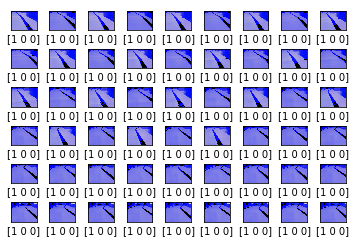

Numero Imagenes:  358


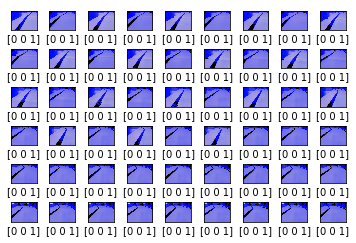

In [21]:
colorData('Fin_Original_Color_02',t_data,t_labels,-0.2)
colorData('Fin_Giro_Color_02',f_data, f_labels,-0.2)
c2_data, c2_labels = abrir(PATH1+'Fin_Original_Color_02.pkl')
cf2_data, cf2_labels = abrir(PATH1+'Fin_Giro_Color_02.pkl')
print("Numero Imagenes: ",len(c2_data))
mostrarImagenes(imagenes=c2_data[0:54],cls_true=c2_labels[0:54])
print("Numero Imagenes: ",len(cf2_data))
mostrarImagenes(imagenes=cf2_data[0:54],cls_true=cf2_labels[0:54])

 ## Shadow Functions

In [22]:
### Generar Sombras en todas las imagenes
def sombraData(f,data,label):
    sw_data= []
    for i in range(len(data)):
        t = sombraAl(data[i])
        sw_data.append(t)
    s_file = PATH1+f+'.pkl'
    guardar(s_file,sw_data,label)
    
### Sombra Aleatoria    
def sombraAl(img):
    width = img.shape[1]
    hight = img.shape[0]
    x1, y1 = (width * np.random.rand()), 0
    x2, y2 = (width * np.random.rand()), hight
    xm, ym = np.mgrid[0:hight, 0:width]    
    mask = np.zeros_like(img[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.9)
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)

In [23]:
sombraData('FIN_Sombra_Original',t_data,t_labels)
sombraData('FIN_Sombra_Giro',f_data, f_labels)
sombraData('FIN_Sombra_Giro_Brillo',bf_data, bf_labels)
sombraData('FIN_Sombra_Original_Color',c_data, c_labels)
sombraData('FIN_Sombra_Giro_Color',cf_data, cf_labels)
sombraData('FIN_Sombra_Original_Color_02',c2_data, c2_labels)
sombraData('FIN_Sombra_Giro_Color_02',cf2_data, cf2_labels)

C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Sombra_Original.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Sombra_Giro.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Sombra_Giro_Brillo.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Sombra_Original_Color.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Sombra_Giro_Color.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Sombra_Original_Color_02.pkl saved!
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN_Sombra_Giro_Color_02.pkl saved!


 ## Show Shadow Images

Numero Imagenes:  358


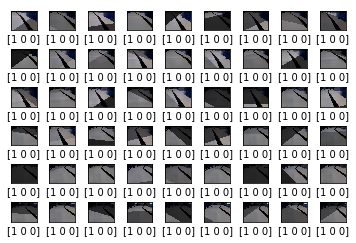

Numero Imagenes:  358


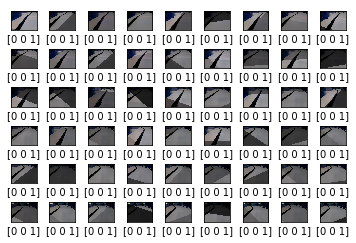

Numero Imagenes:  358


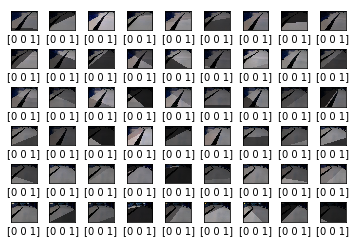

Numero Imagenes:  358


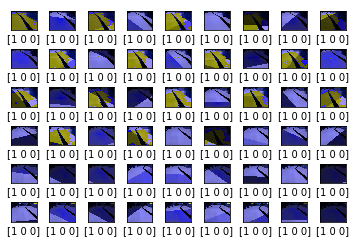

Numero Imagenes:  358


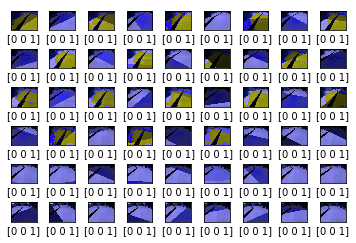

Numero Imagenes:  358


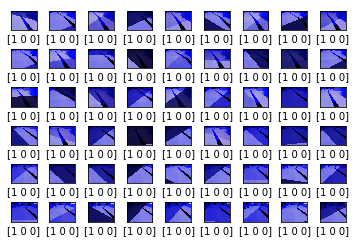

Numero Imagenes:  358


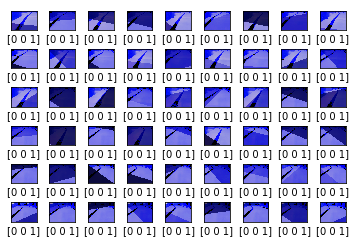

In [24]:
so_data, so_labels = abrir(PATH1+'FIN_Sombra_Original.pkl')
sf_data, sf_labels = abrir(PATH1+'FIN_Sombra_Giro.pkl')
print("Numero Imagenes: ",len(so_data))
mostrarImagenes(imagenes=so_data[0:54],cls_true=so_labels[0:54])
print("Numero Imagenes: ",len(sf_data))
mostrarImagenes(imagenes=sf_data[0:54],cls_true=sf_labels[0:54])

sfb_data, sfb_labels = abrir(PATH1+'FIN_Sombra_Giro_Brillo.pkl')
print("Numero Imagenes: ",len(sfb_data))
mostrarImagenes(imagenes=sfb_data[0:54],cls_true=sfb_labels[0:54])

soc_data, soc_labels = abrir(PATH1+'FIN_Sombra_Original_Color.pkl')
sfc_data, sfc_labels = abrir(PATH1+'FIN_Sombra_Giro_Color.pkl')
print("Numero Imagenes: ",len(soc_data))
mostrarImagenes(imagenes=soc_data[0:54],cls_true=soc_labels[0:54])
print("Numero Imagenes: ",len(sfc_data))
mostrarImagenes(imagenes=sfc_data[0:54],cls_true=sfc_labels[0:54])

soc2_data, soc2_labels = abrir(PATH1+'Fin_Sombra_Original_Color_02.pkl')
sfc2_data, sfc2_labels = abrir(PATH1+'Fin_Sombra_Giro_Color_02.pkl')
print("Numero Imagenes: ",len(soc2_data))
mostrarImagenes(imagenes=soc2_data[0:54],cls_true=soc2_labels[0:54])
print("Numero Imagenes: ",len(sfc2_data))
mostrarImagenes(imagenes=sfc2_data[0:54],cls_true=sfc2_labels[0:54])


 ## Load Pickle Training

In [7]:
### Abrir Pickle
def abrirFin(f):
    with open(f,'rb') as fi:  
        t, l = pickle.load(fi, encoding='latin1')
    return t, l

### Cargar Todos los pickles generados anteriormente
def cargarFin(files):
    tng_data = glob.glob(files)
    t, l = abrirFin(tng_data[0])
    tn_size = len(t)*len(tng_data)
    print('Numero Imagenes: '+str(tn_size))
    tt_data = np.zeros([tn_size,240,320,3],dtype=np.uint8)
    tt_label = np.zeros([tn_size,3],dtype=np.uint8)
    i = 0
    for pkl in tng_data:
        print(pkl)
        t = []
        l = []
        t, l = abrirFin(pkl)
        for ix in range(len(t)):
            tt_data[i] = t[ix]
            tt_label[i] = l[ix]
            i += 1
    return tt_data, tt_label

In [26]:
PATH_Fin = PATH1+'FIN_*.pkl'
img_array, label_array = cargarFin(PATH_Fin)

Numero Imagenes: 5370
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Brillo_Giro.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Brillo_Original.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Giro.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\Fin_Giro_Color_02.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Giro_Color_1.8.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Original.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\Fin_Original_Color_02.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Original_Color_1.8.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Giro.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Giro_Brillo.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Giro_Color.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Giro_Color_02.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Original.pkl
C:/Users/Usuario/

## Show Images

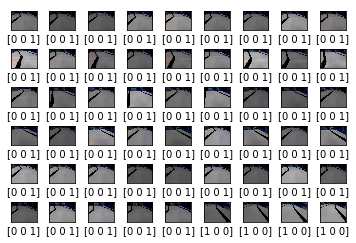

In [27]:
mostrarImagenes(imagenes=img_array[54:108],cls_true=label_array[54:108])

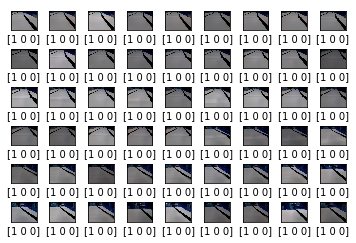

In [28]:
mostrarImagenes(imagenes=img_array[108:162],cls_true=label_array[108:162])

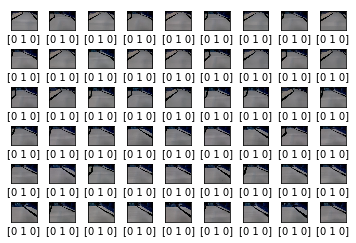

In [29]:
mostrarImagenes(imagenes=img_array[1000:1054],cls_true=label_array[1000:1054])

 ## Save Final Conversion

In [30]:
guardar(PATH1+'FIN.pkl',img_array,label_array)

C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/FIN.pkl saved!


 ## Load Final Conversion

In [31]:
u,i = abrirFin(PATH1+'FIN.pkl')
print("Numero Imagenes: ",len(u))

Numero Imagenes:  5370


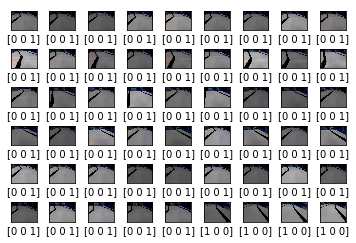

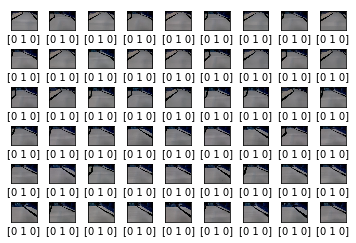

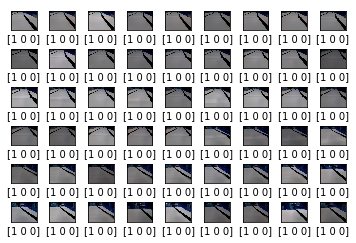

In [32]:
mostrarImagenes(imagenes=u[54:108],cls_true=i[54:108])
mostrarImagenes(imagenes=u[1000:1054],cls_true=i[1000:1054])
mostrarImagenes(imagenes=u[108:162],cls_true=i[108:162])

# Keras Training

 ## Import Libraries

In [1]:
import time
import numpy as np
import glob
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential, model_from_json
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.callbacks import ModelCheckpoint
from keras import optimizers
import tensorflow as tf

D:\anac3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


 ## Keras Neural Network Structure

In [9]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
np.random.seed(0)
### Dimensiones Imagen 
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 240, 320, 3
SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
### Paths archivos
PATH2="C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/"
FILES = PATH2+'Fin_*.pkl'
MODEL = PATH2 + 'Model'
### Cargar y separar datos de entrenamiento y test
print("Cargando Archivos")    
X, y = cargarFin(FILES)
print("Separar Entrenamiento y test")
train, test, train_labels, test_labels = train_test_split(X,y, test_size = 0.2)
print("Estructura Modelo")
### Parametros entrenamiento
learning_rates = [0.001]
batch_sizes = [32]
optz_choices = ['Adam']
EPOCHS = 25
### Construccion de la red
for lr in learning_rates:
    for bs in batch_sizes:
        for optz in optz_choices:
            layer1 = 100
            layer2 = 50
            model = Sequential()
            model.add(Conv2D(36, (5, 5), activation='elu', strides=(2, 2),input_shape=SHAPE))
            model.add(Conv2D(24, (5, 5), activation='elu', strides=(2, 2)))
            model.add(Conv2D(48, (5, 5), activation='elu', strides=(2, 2)))
            model.add(Conv2D(64, (3, 3), activation='elu'))
            model.add(Conv2D(64, (3, 3), activation='elu'))
            model.add(Dropout(0.5))
            model.add(Flatten())
            model.add(Dense(layer1, input_dim=SHAPE, activation='elu'))
            model.add(Dense(layer2, activation='elu'))
            model.add(Dense(3))
            print(model.summary())
            print("Modelo Compilando")
            learn_rate = lr
            BATCH_SIZE = bs
            if (optz == 'SGD'):
                opt = optimizers.SGD(lr=learn_rate)
            else:
                opt = optimizers.Adam(lr=learn_rate)
            model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

            checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only=True,
                                 mode='auto')
            print("Ajustando Modelo")
            model.fit(train
                    , train_labels
                    , validation_data=(test, test_labels)
                    , epochs=EPOCHS
                    , batch_size=BATCH_SIZE
                    , verbose=1)
            print("Evaluando Modelo")
            scores_train = model.evaluate(train, train_labels)
            eval_train = (("\n Evaluando Datos Entrenamiento: %s: %.2f%%") % (model.metrics_names[1], scores_train[1]*100))
            print(eval_train)
            scores_test = model.evaluate(test, test_labels)
            eval_test = (("\n Evaluando Datos Test: %s: %.2f%%") % (model.metrics_names[1], scores_test[1]*100))
            print(eval_test)
            print("Guardando Modelo")
            model_json = model.to_json()
            with open('C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/k/models.json','w') as json_file:
                json_file.write(model_json)
            model.save_weights('C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle/k/kmodels.h5')
            print("Modelo Guardado")
print("Entrenamiento Terminado")

Cargando Archivos
Numero Imagenes: 5370
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Brillo_Giro.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Brillo_Original.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Giro.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\Fin_Giro_Color_02.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Giro_Color_1.8.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Original.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\Fin_Original_Color_02.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Original_Color_1.8.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Giro.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Giro_Brillo.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Giro_Color.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Giro_Color_02.pkl
C:/Users/Usuario/Desktop/Pruebas/kerasDirec/pickle\FIN_Sombra_Original.pkl

# Check model result

## Import Libraries

In [2]:
import keras.backend.tensorflow_backend
from keras.backend import clear_session
from keras.models import load_model
from keras.models import model_from_json
import tensorflow as tf
import threading
import time

## Load Model and Prediction

In [5]:
### Cargar Modelo
def cargar():
    json_file = open('D:/kerasDirec/pickle/k/models.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("D:/kerasDirec/pickle/k/kmodels.h5")
    return loaded_model

loaded_model = cargar()
loaded_model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy']) 

### Obtener Prediccion
def get_direction(img):
        t = time.time()
        res = model.predict(img.reshape((-1,240,320,3)), batch_size=1)
        print(res)
        move = np.argmax(res)
        direction = []
        if move == 0:
            direction = ['Izquierda','Up']
        elif move == 1:
            direction = ['Recto','Up']
        elif move == 2:
            direction = ['Derecha','Up']
        return direction

print(loaded_model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 118, 158, 36)      2736      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 57, 77, 24)        21624     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 37, 48)        28848     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 35, 64)        27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 33, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)  

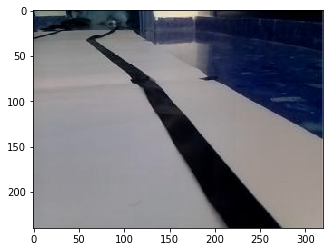

[[ 0.8710389  -0.14269987 -0.04177891]]
['Izquierda', 'Up']


In [16]:
image1 = cv2.imread('C:/Users/Usuario/Desktop/Pruebas/kerasDirec/fotosPi/l0000033.jpg')
plt.imshow(image1)
plt.show()
print(get_direction(image1))